In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
data = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

## Visualizing the outlier

<Axes: >

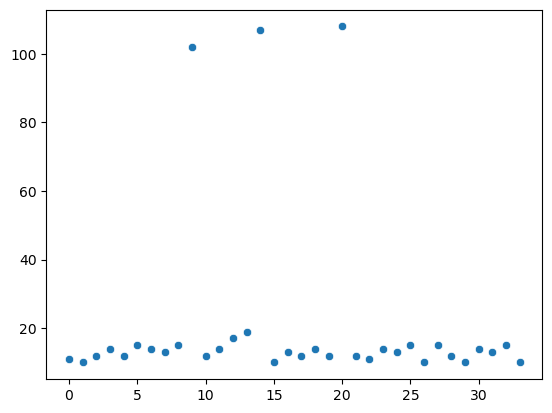

In [59]:
sns.scatterplot(data=data)

<Axes: >

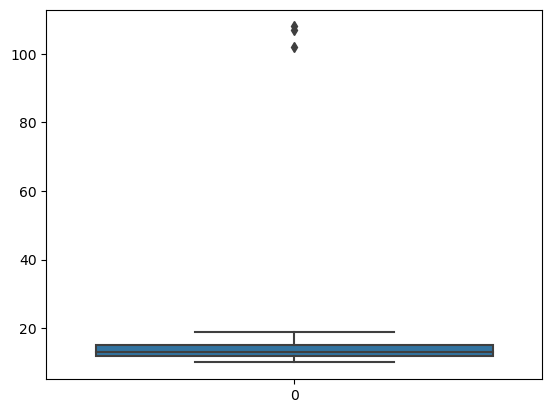

In [60]:
sns.boxplot(data=data)

## Techniques for handling outliers

    1. Z score
    2. IQR (Inter Quuartile Range)

## Z score

    Z = X - μ / σ

In [61]:
outliers = []

def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

In [62]:
outlier_data = detect_outlier(data)
outlier_data

[102, 107, 108]

## IQR

75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

### Step 1

In [63]:
sorted(data)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

### Step 2

In [64]:
q1, q3 = np.percentile(data, [25,75])
q1, q3

(12.0, 15.0)

### Step 3

In [65]:
iqr = q3 - q1
iqr

3.0

In [66]:
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
lower, upper

(7.5, 19.5)

In [67]:
outlier = []
no_outlier = []
for i in data:
    if i <= lower or i >= upper:
        outlier.append(i)
    else:
        no_outlier.append(i)

In [68]:
outlier

[102, 107, 108]

In [69]:
no_outlier

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 12,
 14,
 17,
 19,
 10,
 13,
 12,
 14,
 12,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

## Changing the outliers with mean

In [70]:
mean = int(np.mean(no_outlier))

for i in range(len(data)):
    if data[i] <= lower or data[i] >= upper:
        data[i] = mean

data

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 13,
 12,
 14,
 17,
 19,
 13,
 10,
 13,
 12,
 14,
 12,
 13,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

<Axes: >

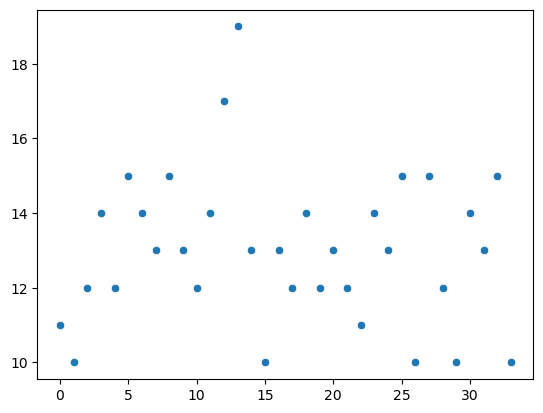

In [71]:
sns.scatterplot(data=data)

<Axes: >

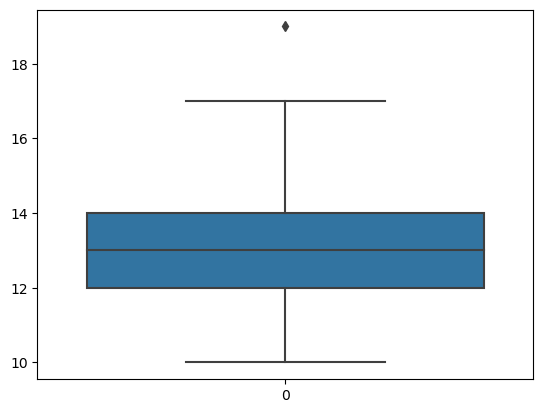

In [72]:
sns.boxplot(data=data)